THƯ VIỆN

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

---

KHAI BÁO

In [ ]:
catergories = ['real', 'spoof']

In [ ]:
dataset_dir = 'final_antispoofing'
train_dataset_dir = os.path.join(dataset_dir, 'train')
test_dataset_dir = os.path.join(dataset_dir, 'test')

In [ ]:
need_dir = 'antispoofing_dataset'
train_dir = os.path.join(need_dir, 'train')
test_dir = os.path.join(need_dir, 'test')

---

CẤU TRÚC CÂY

---

CHIA FILE VÀ XỬ LÍ

In [5]:
def train_test_split_to_train(data_dir):
    for split_type in os.listdir(data_dir):
        path_to_split_type = os.path.join(data_dir, split_type)
        for cater in os.listdir(path_to_split_type):
            path_to_cater = os.path.join(path_to_split_type, cater)
            for human in os.listdir(path_to_cater):
                path_to_human = os.path.join(path_to_cater, human)
                for each_img in os.listdir(path_to_human):
                    path_to_image = os.path.join(path_to_human, each_img)
                    if split_type == 'train':
                        shutil.copy(path_to_image, os.path.join(train_dir, cater, each_img))
                    else:
                        shutil.copy(path_to_image, os.path.join(test_dir, cater, each_img))

In [98]:
train_test_split_to_train(dataset_dir)

---

KIỂM TRA DỮ LIỆU

In [7]:
print('------TRAINING DATASET------')
for cater in catergories:
    path = os.path.join(train_dir, cater)
    if cater == 'real':
        r1 = len(os.listdir(path))
    else:
        s1 = len(os.listdir(path))
    print("{} images trong {} directory".format(len(os.listdir(path)), cater))
print('Total {} images trong training directory'.format(r1 + s1))

print('------TEST DATASET------')
for cater in catergories:
    path = os.path.join(train_dir, cater)
    if cater == 'real':
        r2 = len(os.listdir(path))
    else:
        s2 = len(os.listdir(path))
    print("{} images trong {} directory".format(len(os.listdir(path)), cater))
print('Total {} images trong training directory'.format(r2 + 21))

------TRAINING DATASET------
3896 images trong real directory
3585 images trong spoof directory
Total 7481 images trong training directory
------TEST DATASET------
3896 images trong real directory
3585 images trong spoof directory
Total 3917 images trong training directory


---

TRỰC QUAN HÓA

In [8]:
def get_image(data_dir, number_of_samples):
    image_path = []
    for cater in catergories:
        path = os.path.join(data_dir, cater)
        i = 1
        for image in os.listdir(path):
            if i > number_of_samples:
                break 
            else:
                image_path.append(os.path.join(path, image))
                i += 1
    return image_path

In [9]:
def visualize_dataset(image_path, rows, cols):
    fig = plt.figure(figsize=(20, 20))
    for i in range(1, rows * cols + 1):
        fig.add_subplot(rows, cols, i)
        img_array = cv2.imread(image_path[i - 1])
        fig.subplots_adjust(hspace=1)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.xlabel(image_path[i - 1].split('\\')[-2])
    plt.show()

In [10]:
training_image_path = get_image(train_dir, 25)

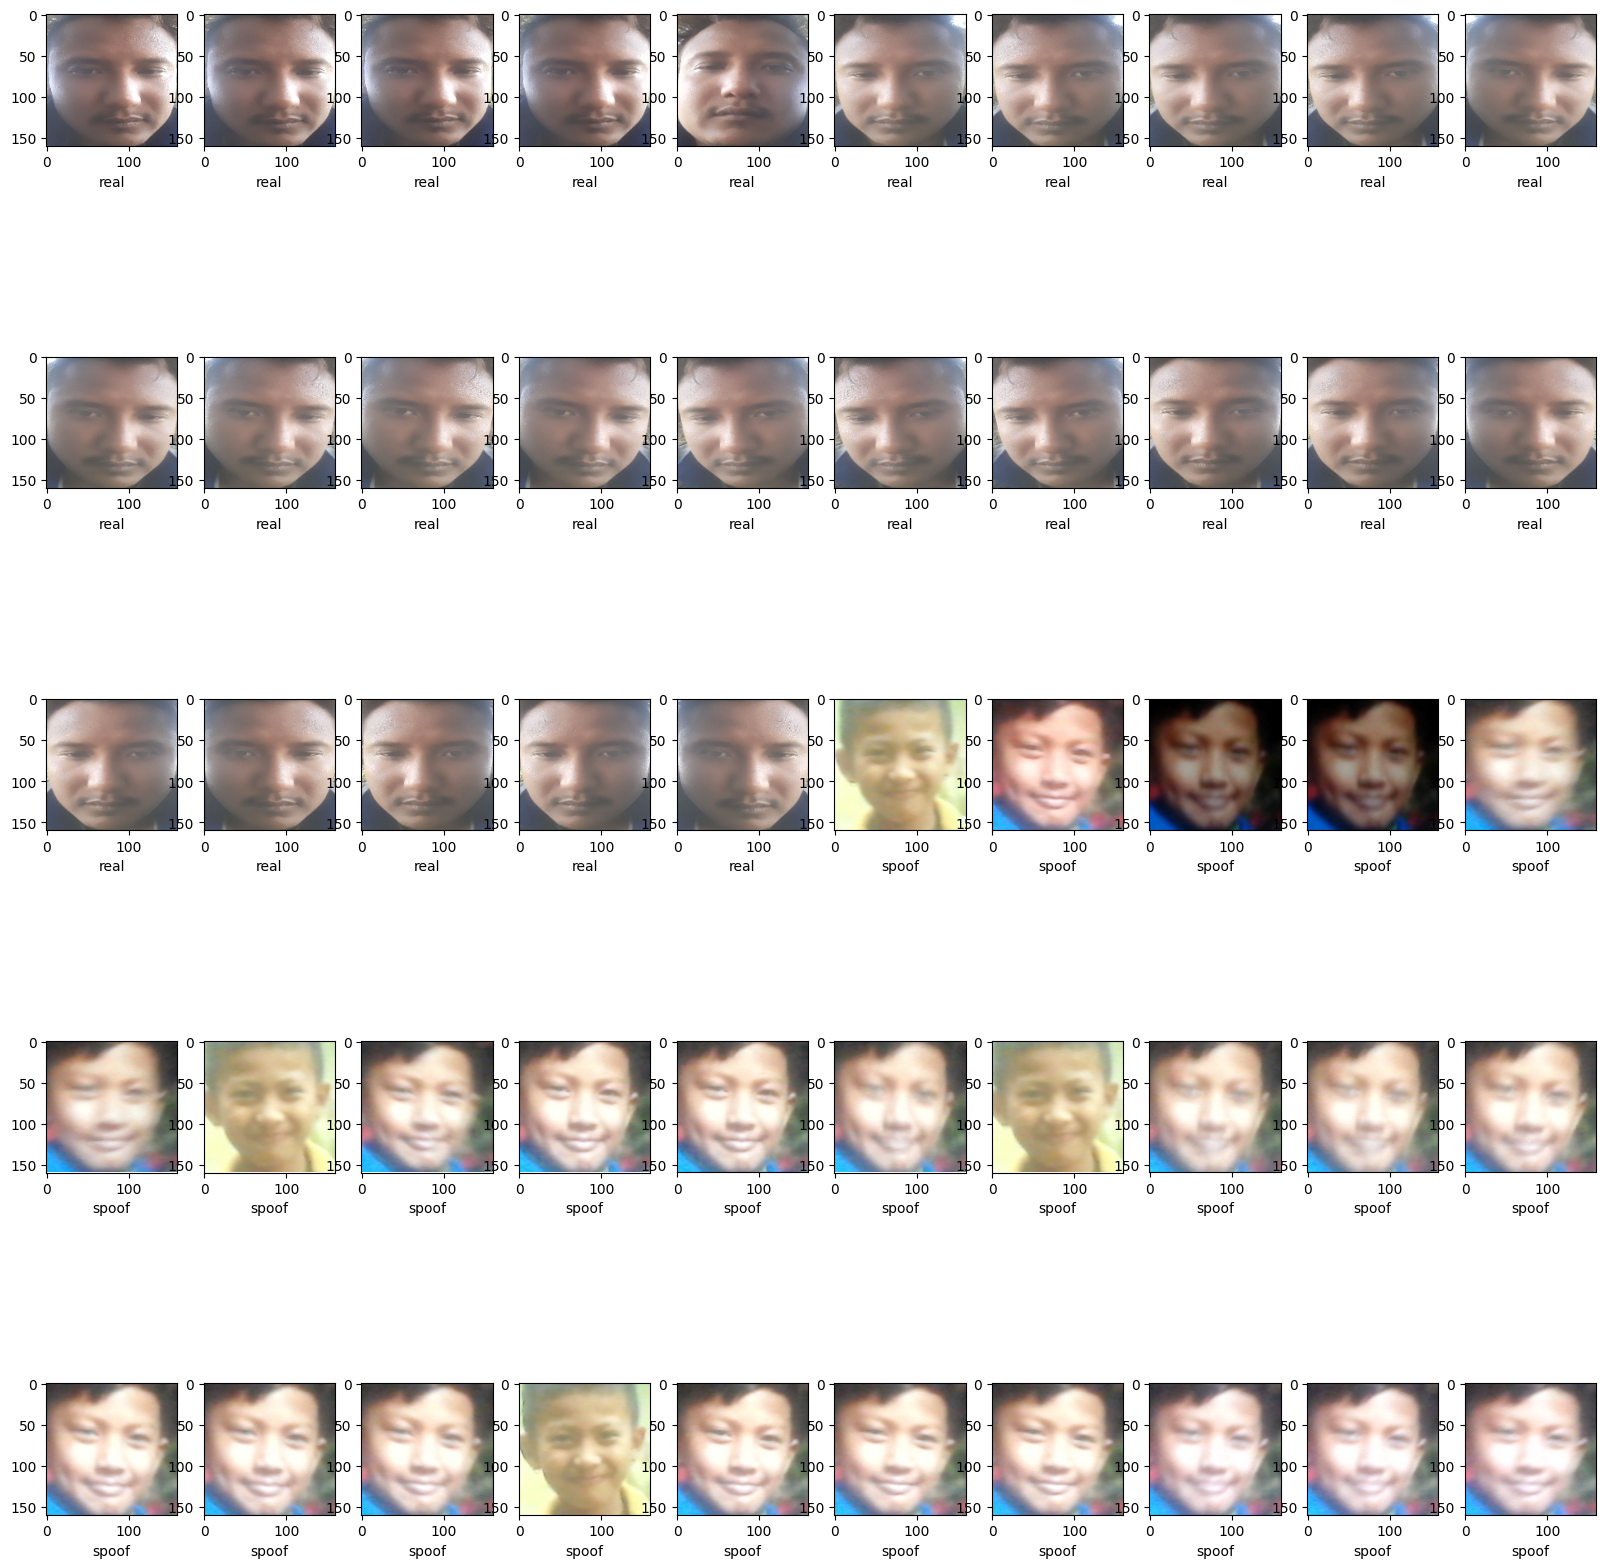

In [11]:
visualize_dataset(training_image_path, 5, 10)